In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math

In [2]:
#scenarioname = "sequences2"
scenarioname = "sequences3"
selected_scenarios = ["iteration1", "iteration2","iteration3","iteration4", "iteration5","iteration6","iteration7","iteration8","iteration9","iteration10"]

In [3]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)





In [4]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}

In [5]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)

LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)

SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
Monthly_ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='MonthlyElectricityPrices', index_col=0)
#CM_data = pd.read_excel(path_to_results, sheet_name='CM_clearing_price', index_col=0)
#Coststosociety_data = pd.read_excel(path_to_results, sheet_name='CosttoSociety', index_col=0)
#VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
#NPVNewPlants_data = pd.read_excel(path_to_results, sheet_name='NPVNewPlants', index_col=0)
ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)
InstalledCapacity_data = pd.read_excel(path_to_results, sheet_name='InstalledCapacity', index_col=0)
Info_data = pd.read_excel(path_to_results, sheet_name='Info', index_col=0)

Invested_capacity_data = pd.read_excel(path_to_results, sheet_name='Invested', index_col=0)
Dismantled_capacity_data = pd.read_excel(path_to_results, sheet_name='Dismantled', index_col=0)
H2Production_data = pd.read_excel(path_to_results, sheet_name='H2Production', index_col=0)
AverageNPVpertechnology = pd.read_excel(path_to_results, sheet_name='AverageNPVpertechnology',  header=[0,1], index_col=0)
AverageProfits = pd.read_excel(path_to_results, sheet_name='Profits',  header=[0,1], index_col=0)

In [6]:
InstalledCapacity_data.drop([2046, 2047,2048,2049, 2050], inplace=True)

In [7]:
InstalledCapacity_data.drop([2090, 2091,2092,2093], inplace=True)

In [8]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
# ax1.plot(Coststosociety_data)
# #ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
# plt.ylim([50, 80])
# ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
# ax2.plot(Coststosociety_data)
# #ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.xlabel('Years', fontsize='large')
# fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

In [9]:
# axs1 = sns.lineplot(data=NPVNewPlants_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='large')
# plt.ylabel('NPV New Plants of test tech', fontsize='large')
# #plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
# #axs2.set_title('NPV new power plants')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'NPVNewPlants.png', bbox_inches='tight', dpi=300)

In [10]:
Dismantled_capacity_data *= -1

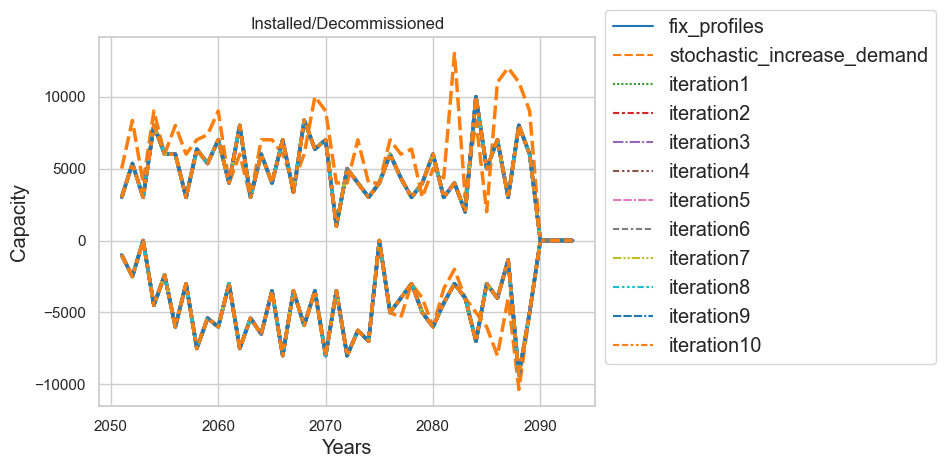

In [11]:
Dismantled_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
Invested_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
axs2 = sns.lineplot(data=Dismantled_capacity_data, palette="tab10", linewidth=2.5)
axs2 = sns.lineplot(data=Invested_capacity_data, palette="tab10", linewidth=2.5, legend = None) 
#sns.lineplot(data=Invested_capacity_data,palette="tab10", linewidth=2.5,    ax=axs2, legend = None)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Capacity', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
axs2.set_title('Installed/Decommissioned')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Invested_Dismantled_ Capacity.png', bbox_inches='tight', dpi=300)

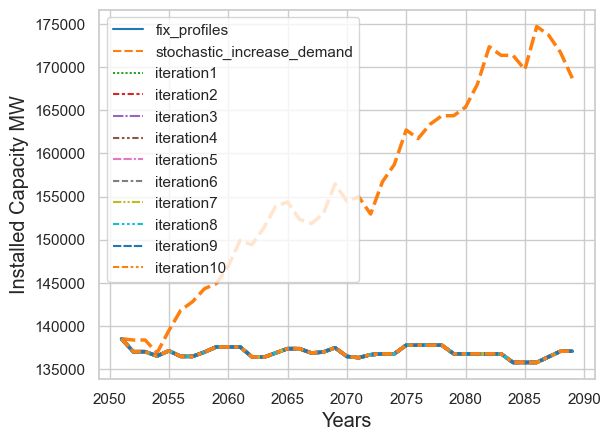

In [12]:
axs2 = sns.lineplot(data=InstalledCapacity_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Installed Capacity MW', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'InstalledCapacity.png', bbox_inches='tight', dpi=300)

In [13]:
melted = pd.melt(CostRecovery_data )

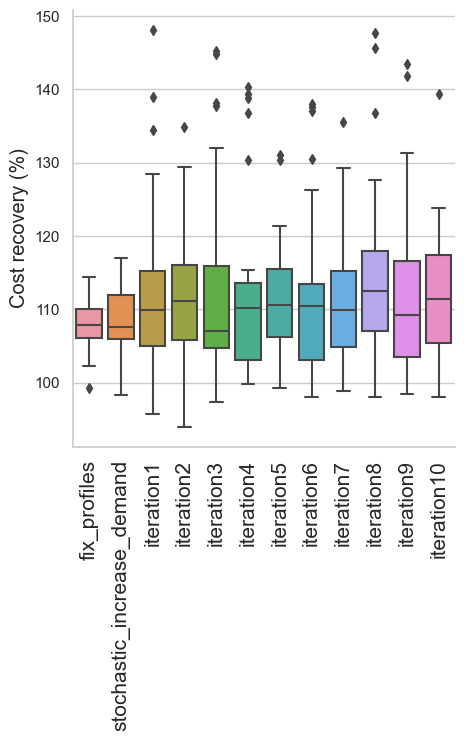

In [14]:
axs33 = sns.catplot(data=melted, x="variable", y="value",  kind="box")
#plt.xlabel('Weather profiles sequence', fontsize='large')
plt.xlabel('', fontsize='large')
plt.ylabel('Cost recovery (%)', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
#fig3 = axs33.get_figure()
axs33.savefig(path_to_plots + '/' + 'Cost_Recovery_boxes.png', bbox_inches='tight', dpi=300)

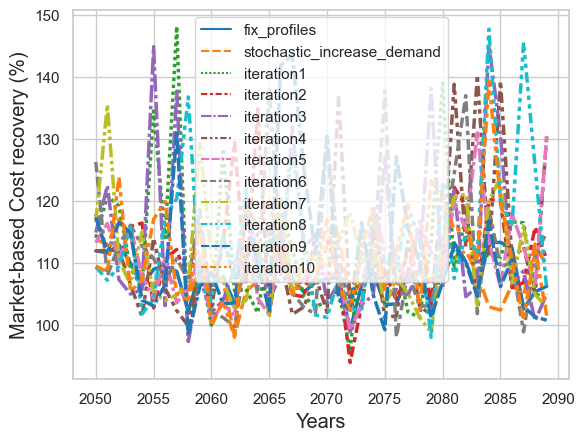

In [15]:
#CostRecovery_data.drop([2050], inplace=True)
axs3 = sns.lineplot(data=CostRecovery_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig3 = axs3.get_figure()
fig3.savefig(path_to_plots + '/' + 'Cost_Recovery.png', bbox_inches='tight', dpi=300)

In [16]:
# CostRecovery_data_substracted = CostRecovery_data.sub(CostRecovery_data['fix_profiles'], axis=0)
# axs3 = sns.lineplot(data=CostRecovery_data_substracted, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='large')
# plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
# plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
# #axs2.set_title('Market-based Cost recovery')
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_substracted.png', bbox_inches='tight', dpi=300)
# axs33 = sns.catplot(data=pd.melt(CostRecovery_data_substracted ), x="variable", y="value",  kind="box")
# plt.xlabel('Weather profiles sequence', fontsize='large')
# plt.ylabel('Cost recovery (%)', fontsize='large')
# plt.tight_layout()
# plt.xticks(rotation=90, size = 15)   
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_difference.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_13572\2939854450.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig6.savefig(path_to_plots + '/' + 'LOLEs.png', bbox_inches='tight', figsize=(4, 3), dpi=300)


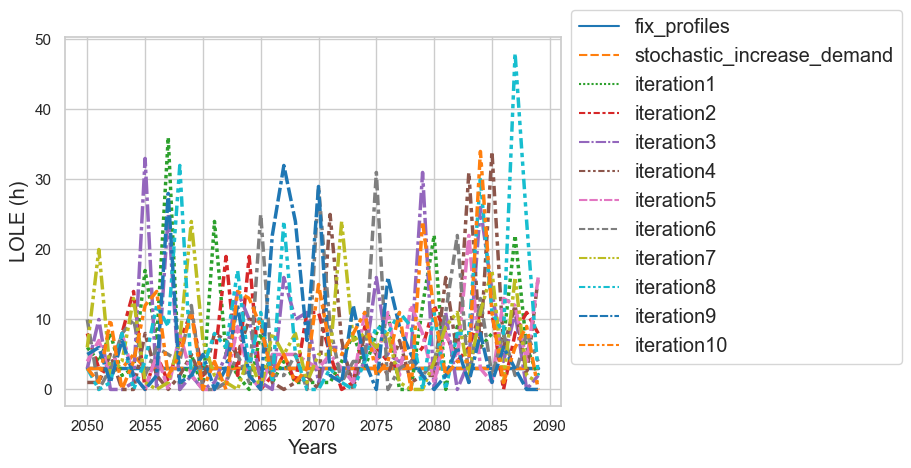

In [17]:
#LOL_data.drop([2050], inplace=True)
# fig, axes = plt.subplots(nrows=2, ncols=1)
# sns.set_style("whitegrid")
# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,  ax=axes[0], legend = None)
# plt.ylim([0, 25])
# plt.ylabel('Hours', fontsize='large')

# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,    ax=axes[1], legend = None)
# plt.ylim([0, 220])
# #axes[1].legend(LOL_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
# plt.ylabel('Hours', fontsize='large')
# axes[0].set_title('LOLE')
# fig.savefig(path_to_plots + '/' + 'LOLE.png', bbox_inches='tight', dpi=300)
axs6 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5, )
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('LOLE (h)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('LOLE')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'LOLEs.png', bbox_inches='tight', figsize=(4, 3), dpi=300)

In [18]:
#LOL_data_substracted = LOL_data.sub(LOL_data["fix_profiles"], axis=0)

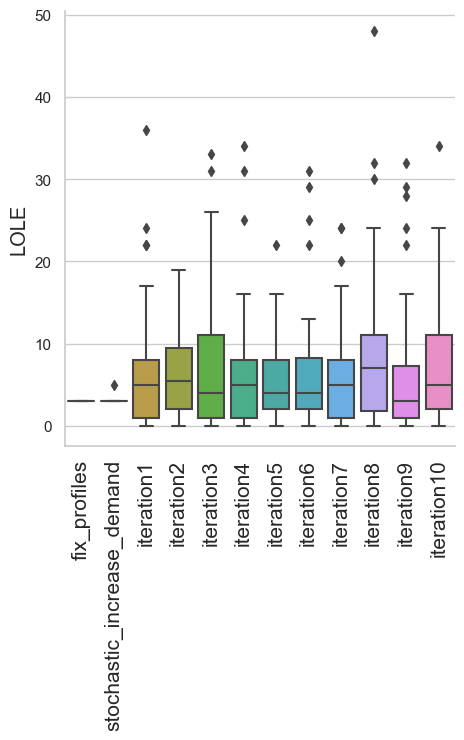

In [19]:
axs1 = sns.catplot( data=pd.melt(LOL_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('LOLE', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)  

axs1.savefig(path_to_plots + '/' + 'LOLE_boxes.png', bbox_inches='tight', dpi=300)

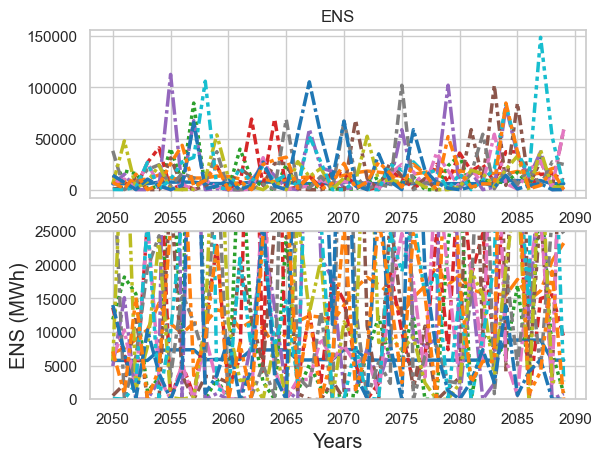

In [20]:
fig, axes= plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[0], legend = None)
plt.ylabel('MWh', fontsize='medium')
plt.ylim([0, 25000])
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[1], legend = None)
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')
#axes[1].legend(ENS_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
axes[0].set_title('ENS')
fig.savefig(path_to_plots + '/' + 'Energy not supplied.png', bbox_inches='tight', dpi=300)

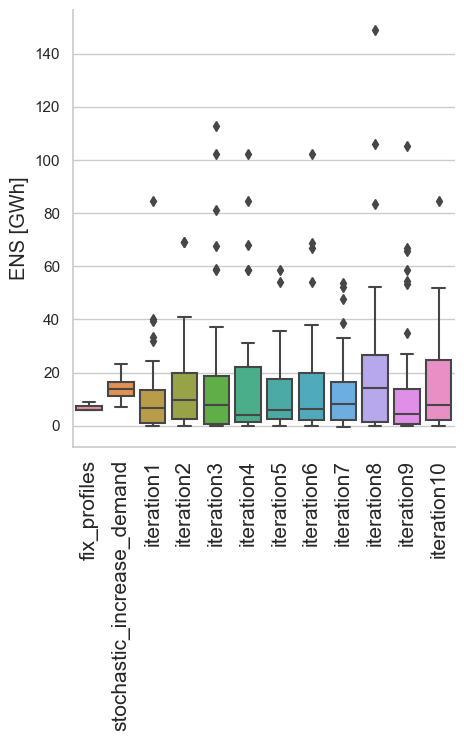

In [21]:
ENS_data = ENS_data/1000
axs1 = sns.catplot( data=pd.melt(ENS_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('ENS [GWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'ENS_boxes.png', bbox_inches='tight', dpi=300)

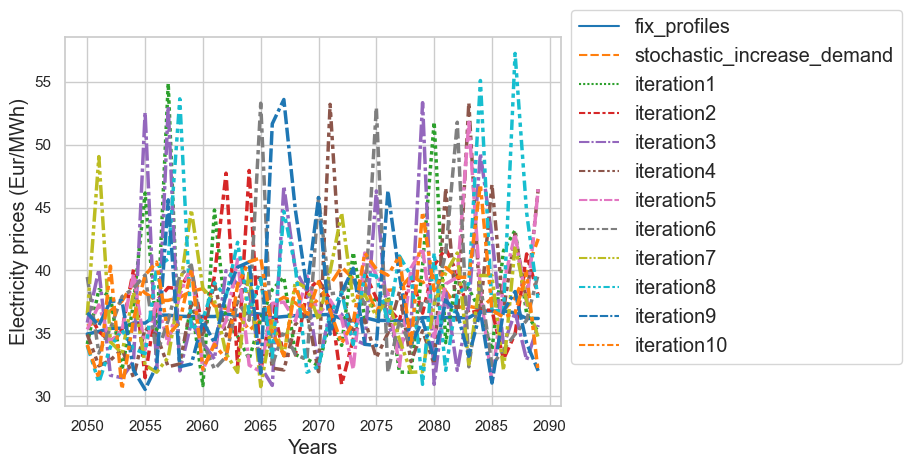

In [22]:
#CostRecovery_data.plot()
#ElectricityPrices_data.drop([2050], inplace=True)
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

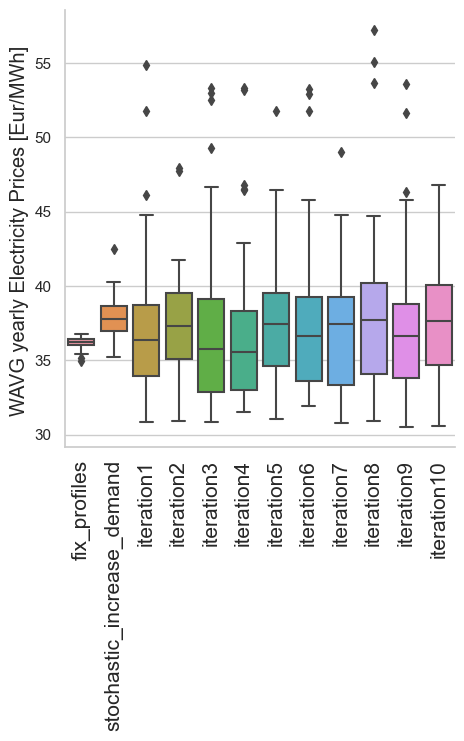

In [23]:
axs1 = sns.catplot( data=pd.melt(ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Electicity_prices_boxes.png', bbox_inches='tight', dpi=300)

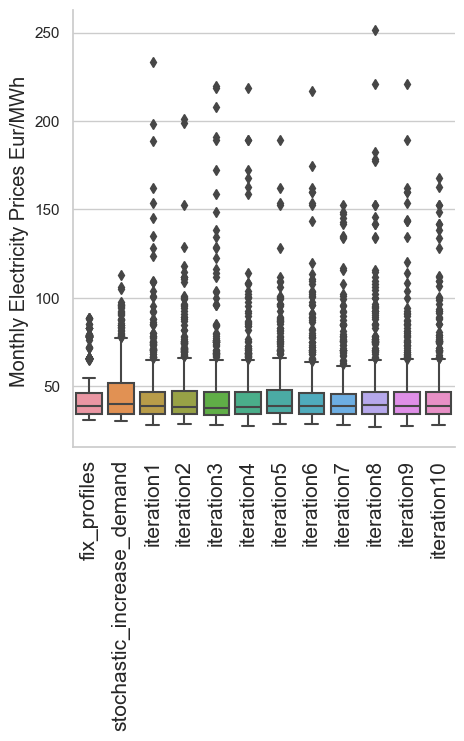

In [24]:
axs1 = sns.catplot( data=pd.melt(Monthly_ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Monthly Electricity Prices Eur/MWh ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'Monthly_Electicity_prices_boxes.png', bbox_inches='tight', dpi=300)

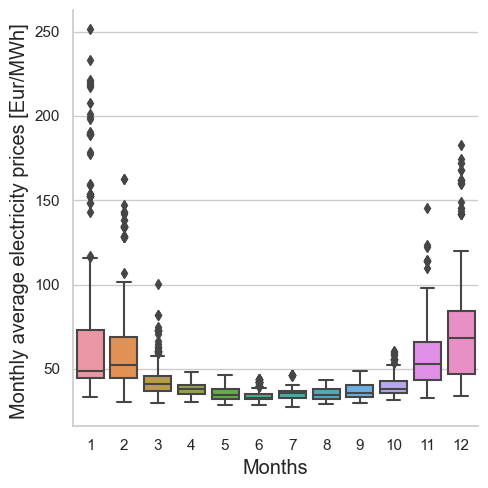

In [25]:
months = list(range(1,13))*40
Monthly_ElectricityPrices_data['group'] = months
monthly_melted_electricity_prices = Monthly_ElectricityPrices_data.melt(id_vars='group', var_name='Variable', value_name='Value')
axs1 = sns.catplot( data=monthly_melted_electricity_prices, x="group", y="Value",  kind="box")
plt.xlabel('Months', fontsize='large')
plt.ylabel('Monthly average electricity prices [Eur/MWh] ', fontsize='large')
axs1.savefig(path_to_plots + '/' + 'Monthly_Electricity_prices.png', bbox_inches='tight', dpi=300)

In [26]:
Monthly_ElectricityPrices_data

,fix_profiles,stochastic_increase_demand,iteration1,iteration2,iteration3,iteration4,iteration5,iteration6,iteration7,iteration8,iteration9,iteration10,group
years,,,,,,,,,,,,,
0,43.451651,43.991402,70.476271,42.399144,56.948673,42.274693,41.701431,72.350716,44.227712,42.402666,44.131154,42.270021,1
1,48.305128,52.076293,46.165881,43.238108,53.374373,58.412810,46.650436,55.299468,89.790299,49.573509,42.886304,47.010687,2
2,37.819203,38.094751,46.013637,36.816744,38.202050,37.666436,36.354029,39.684522,38.099847,36.212345,37.182268,36.415047,3
3,37.966263,38.128975,31.517501,38.017673,39.230456,38.847388,36.720826,37.954730,39.179554,37.943292,37.925001,37.732128,4
4,36.182023,36.880256,29.717366,35.921322,36.406500,37.256846,36.340691,38.509227,35.783735,36.031445,36.857955,35.966366,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,32.198052,33.610459,34.185077,38.386156,32.308997,30.855585,30.855585,40.952497,35.726266,40.202142,29.877089,32.031525,8
476,33.292844,34.303698,37.347338,42.030889,33.663202,43.974298,43.974298,36.235137,39.005535,40.358845,34.348899,32.497045,9
477,35.762536,38.285523,39.934697,36.663961,36.267539,55.496598,55.496598,48.663308,38.505131,40.996697,37.912771,41.882466,10


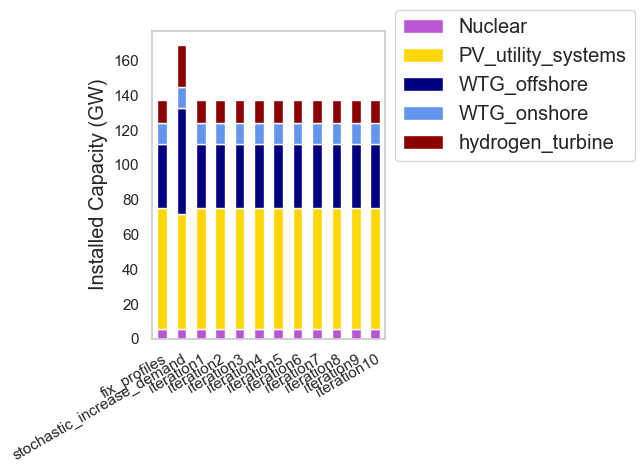

In [27]:
cpacities = Last_year_capacity_data.T
cpacities = cpacities/1000
cpacities_nozeroes = cpacities[cpacities>0]
cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)
colors = [technology_colors[tech] for tech in cpacities_nozeroes.columns.values]
axs9 = cpacities_nozeroes.plot(kind='bar', stacked=True, color=colors, figsize = (3,4))
plt.grid()
sns.set_style("whitegrid")
axs9.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Installed Capacity (GW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))
fig9 = axs9.get_figure()
fig9.savefig(path_to_plots + '/' + 'Last year capacity.png', bbox_inches='tight', dpi=300)


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_13572\4107581734.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")


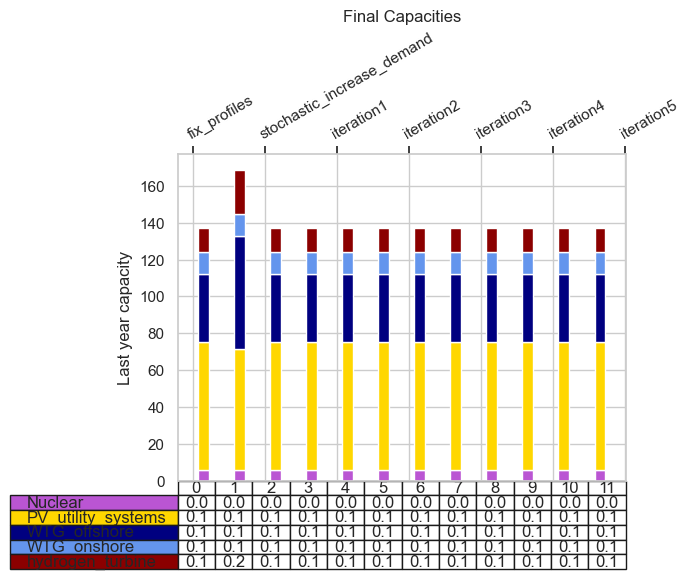

In [28]:
final_year_capacities = cpacities_nozeroes.T
data =final_year_capacities.values
columns = list(range(0, len(final_year_capacities.columns))) #final_year_capacities.columns
newcolumns = final_year_capacities.columns.insert(0, "new")
rows = final_year_capacities.index

n_rows = len(data)
bar_width = 0.3
index = np.arange(len(columns)) + bar_width

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
fig, axs = plt.subplots()
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc ='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Final Capacities')
plt.ylabel("Last year capacity")

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")
# plt.show()
# plt.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png')
fig10 = plt.gcf()
fig10.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png', bbox_inches='tight', dpi=300)

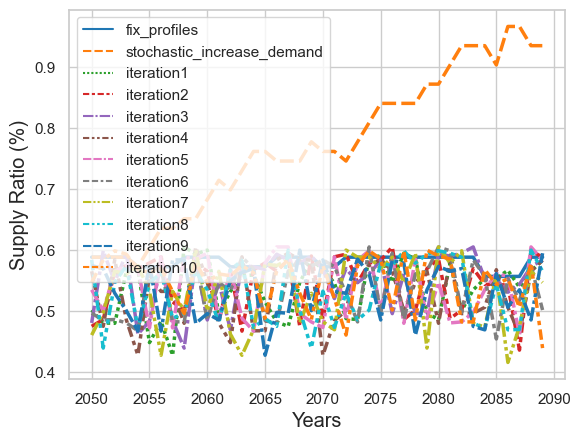

In [29]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


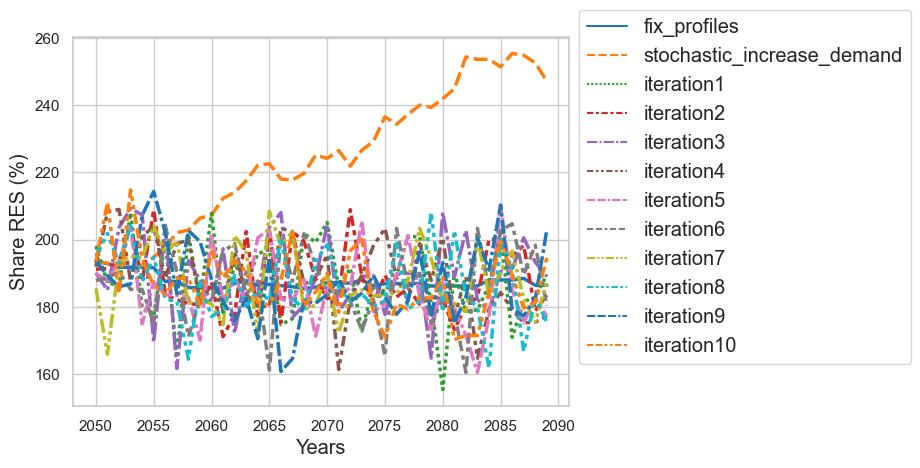

In [30]:
percentage_RES = ShareRES_data
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)


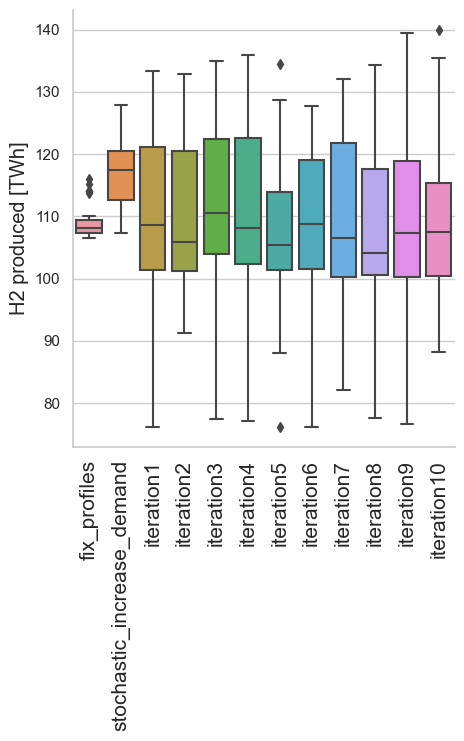

In [31]:
H2Production_data_twh = (H2Production_data/1000000)*0.74
axs1 = sns.catplot( data=pd.melt(H2Production_data_twh), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('H2 produced [TWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Electrolyzer_boxes.png', bbox_inches='tight', dpi=300)

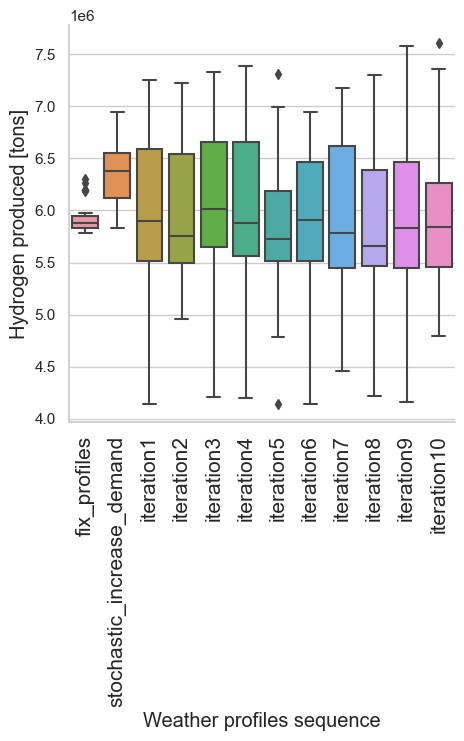

In [32]:
Energy_consumed_in_electrolysis = 1/ 0.74
#Hydrogen produced (kg) = Energy consumed in electrolysis (kWh) / LHV of hydrogen kWh/kg
kg_hydrogen_per_kwh= Energy_consumed_in_electrolysis/ 33.6 
ton_hydrogen_per_mwh = kg_hydrogen_per_kwh
H2Production_tons = H2Production_data*ton_hydrogen_per_mwh
axs1 = sns.catplot( data=pd.melt(H2Production_tons), x="variable", y="value",  kind="box")
plt.xlabel('Weather profiles sequence', fontsize='large')
plt.ylabel('Hydrogen produced [tons]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Hydrogen production_boxes.png', bbox_inches='tight', dpi=300)

In [33]:
# sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.2)
# sheet_name = "extendedNL"
# df = pd.read_excel("C:\\toolbox-amiris-emlab\\data\\Power_plants.xlsx",
#                    sheet_name=sheet_name)
# colors = [technology_colors[tech] for tech in df["Technology"].unique()]

# fig1 = sns.relplot(x="Age", y="Efficiency", hue="Technology", size="Capacity",
#                    sizes=(40, 400), alpha=.5, palette=colors,
#                    height=6, data=df)
# plt.xlabel("Age", fontsize="large")
# plt.ylabel("Efficiency", fontsize="large")
# fig1.savefig(path_to_plots + '/' + 'Initial_power_plants' +sheet_name + '.png', bbox_inches='tight', dpi=300)


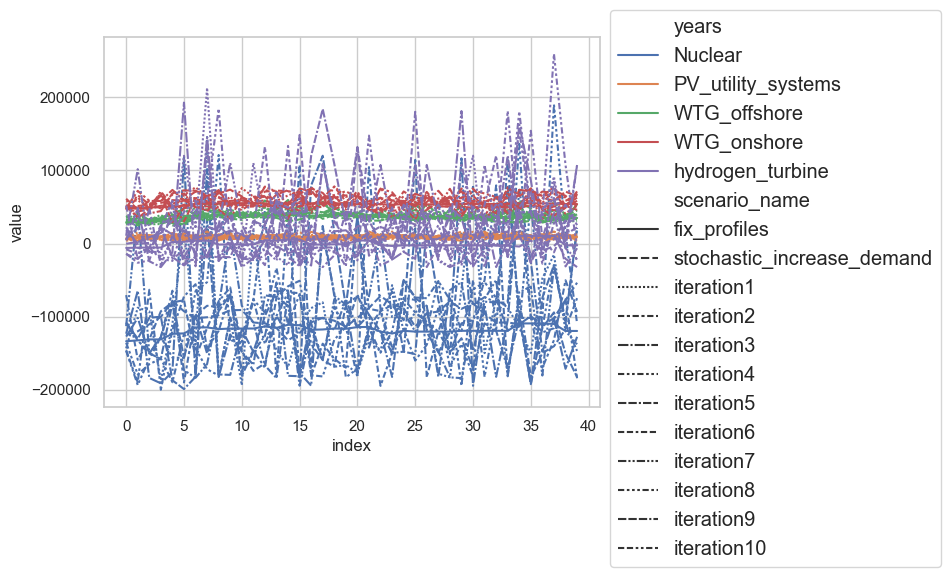

In [34]:
AverageProfits_all = pd.melt(AverageProfits.reset_index(), id_vars='index')
AverageProfits_all.head()
sns.lineplot(x="index", y="value", style="scenario_name", hue = "years",
            data=AverageProfits_all)
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))

In [35]:
AverageNPVpertechnology_all = pd.melt(AverageNPVpertechnology.reset_index(), id_vars='index')
AverageNPVpertechnology_all.head()

,index,years,scenario_name,value
0,2050,Nuclear,fix_profiles,-2.965604e+06
1,2051,Nuclear,fix_profiles,-2.953452e+06
2,2052,Nuclear,fix_profiles,-2.940196e+06
3,2053,Nuclear,fix_profiles,-2.940196e+06
4,2054,Nuclear,fix_profiles,-2.861234e+06


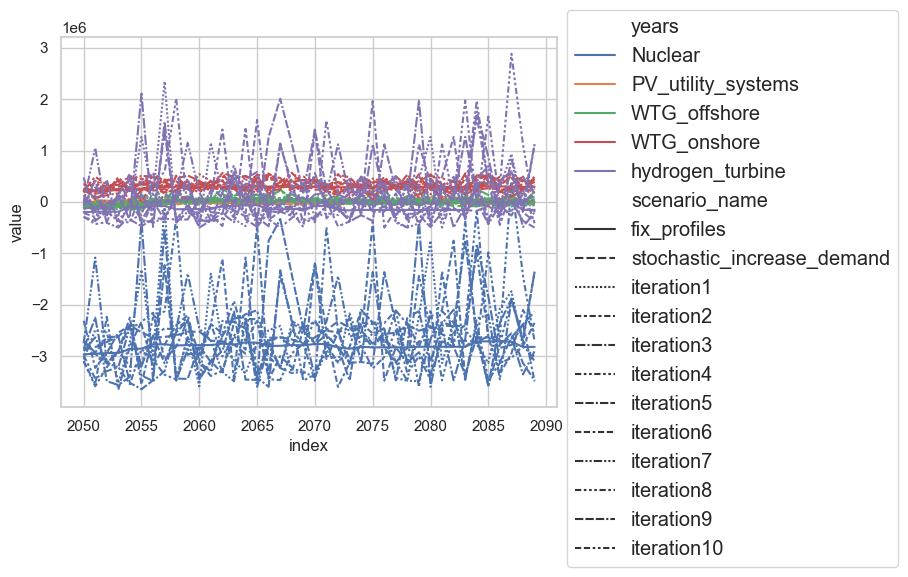

In [36]:
sns.lineplot(x="index", y="value", style="scenario_name", hue = "years",
            data=AverageNPVpertechnology_all)
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))

In [37]:
FLH_data = pd.read_excel(path_to_results, sheet_name='FLH', index_col=0)
Years_data = pd.read_excel(path_to_results, sheet_name='YEARS', index_col=0)

In [38]:
min_val = InstalledCapacity_data.min()
max_val = InstalledCapacity_data.max()
normalized_capacity = (InstalledCapacity_data - min_val) / (max_val - min_val)
normalized_capacity.head()

,fix_profiles,stochastic_increase_demand,iteration1,iteration2,iteration3,iteration4,iteration5,iteration6,iteration7,iteration8,iteration9,iteration10
2051,1.000000,0.043593,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2052,0.454545,0.039630,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545
2053,0.454545,0.039630,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545
2054,0.272727,0.000000,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727
2055,0.490909,0.068692,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909


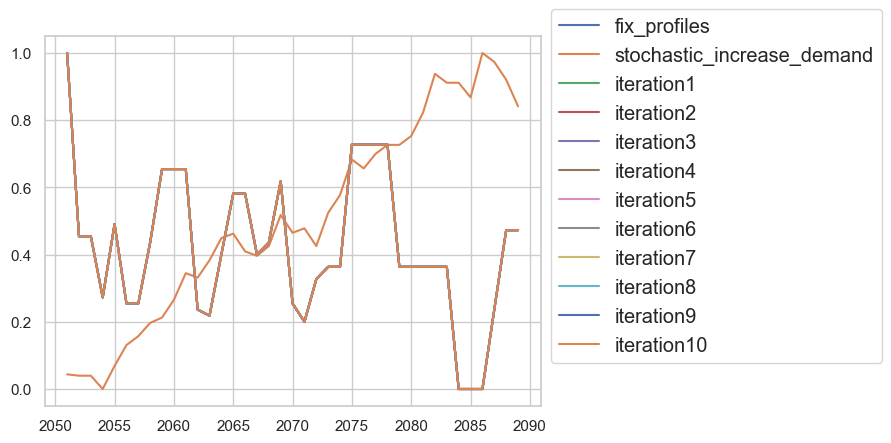

In [39]:
normalized_capacity.plot()
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))

In [40]:
full_load_hours = pd.DataFrame()
full_load_hours= Years_data.applymap(FLH_data['average'].get)
full_load_hours["year"] = full_load_hours.index.values + 2050
full_load_hours.set_index('year', inplace = True)
full_load_hours.drop(2050, inplace = True)
min_val = full_load_hours.min()
max_val = full_load_hours.max()
normalized_FLH = (full_load_hours - min_val) / (max_val - min_val)

In [41]:
normalized_ElectricityPrices = ElectricityPrices_data.copy()
normalized_ElectricityPrices.drop(2050, inplace = True)
min_val = normalized_ElectricityPrices.min()
max_val = normalized_ElectricityPrices.max()
normalized_ElectricityPrices = (normalized_ElectricityPrices - min_val) / (max_val - min_val)

In [42]:
ElectricityPrices_data.drop(2050, inplace = True)

iteration1
stochastic_increase_demand
iteration2
iteration3
iteration4
iteration5
iteration6
iteration7
iteration8
iteration9
iteration10


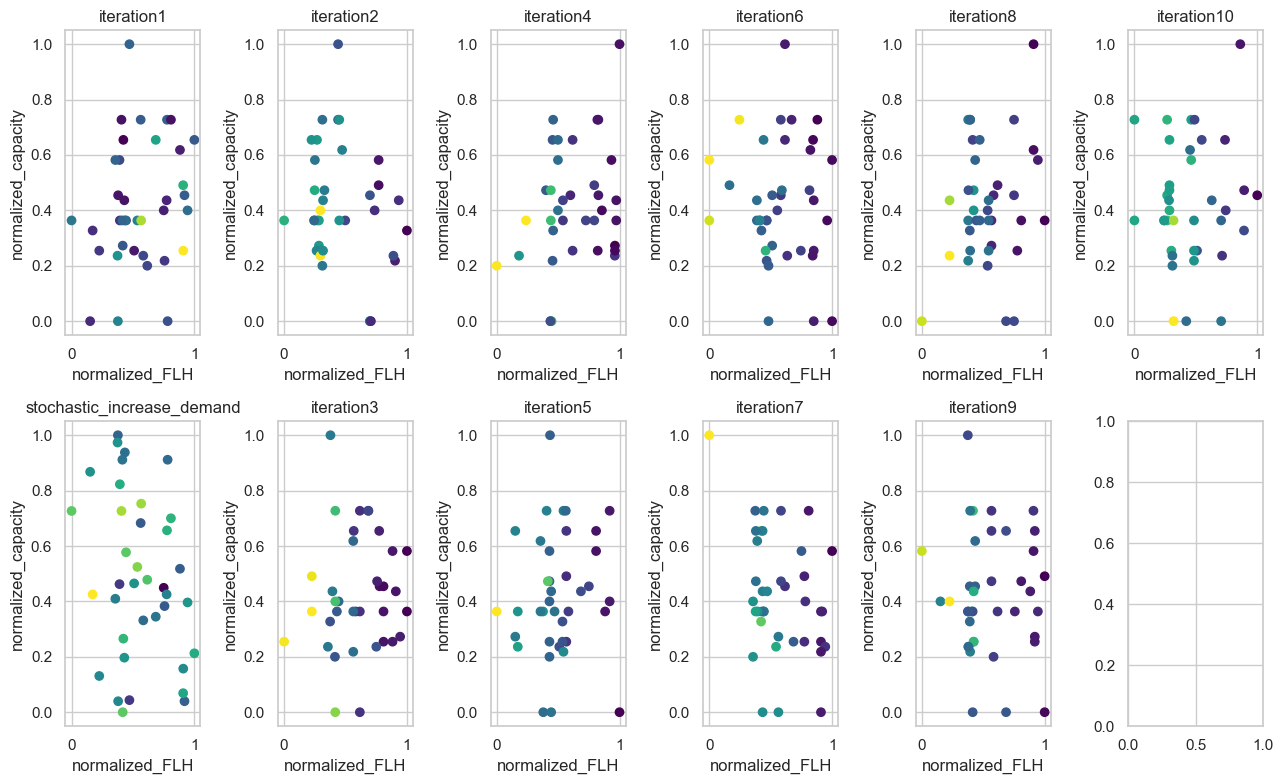

In [43]:
bwr_reversed = plt.cm.get_cmap('bwr')
num_columns = len(normalized_FLH.columns)
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(13, 8))

for i, col1 in enumerate(normalized_FLH.columns):
    print(col1)
    if i == 0:
        ax = axes[0,0]    
    elif  i % 2 == 0:
        ax =axes[0,round(i/2)]        
    else:
        ax = axes[1,math.floor(i/2)]    
    ax.scatter(normalized_FLH[col1], normalized_capacity[col1], c=normalized_ElectricityPrices[col1], cmap='viridis') 
    ax.set_title(col1)
    ax.set_xlabel('normalized_FLH')
    ax.set_ylabel("normalized_capacity")
# plt.xlabel('normalized_FLH')
# plt.ylabel("normalized_capacity")

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


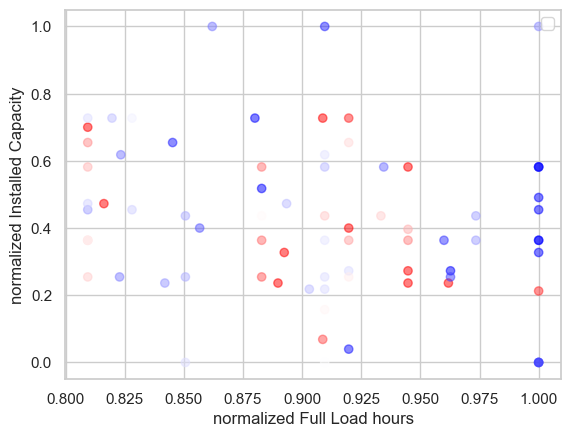

In [44]:
for i, col1 in enumerate(normalized_FLH.columns):
    if i ==0: 
        pass
    else:
        filteredrows =  (normalized_FLH[col1] >= 0.8) & (normalized_FLH[col1] <= 1)
        plt.scatter(normalized_FLH[col1][filteredrows],
                    normalized_capacity[col1][filteredrows],
                    c=normalized_ElectricityPrices[col1][filteredrows], cmap=bwr_reversed,  alpha=0.5) 
plt.xlabel('normalized Full Load hours')
plt.ylabel("normalized Installed Capacity")

plt.legend()
plt.savefig(path_to_plots + '/' + 'yearly_capacity_FLH.png', bbox_inches='tight', dpi=300)

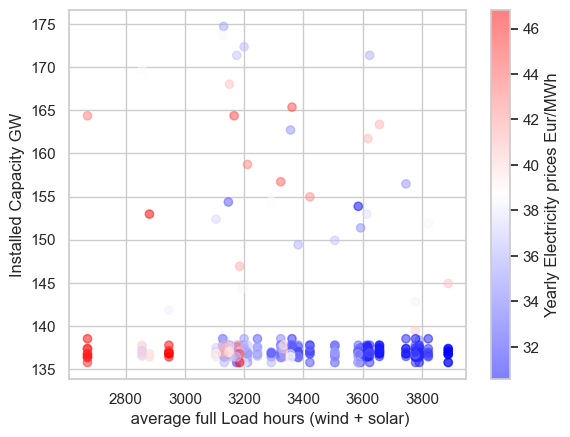

In [45]:
for i, col1 in enumerate(normalized_FLH.columns):
    if i ==0: 
        pass
    else:
        plt.scatter(full_load_hours[col1], InstalledCapacity_data[col1]/1000, 
                    c=ElectricityPrices_data[col1], cmap=bwr_reversed,  alpha=0.5) 
plt.xlabel(' average full Load hours (wind + solar)')
plt.ylabel("Installed Capacity GW")        
plt.colorbar( orientation='vertical',
             label="Yearly Electricity prices Eur/MWh")

plt.savefig(path_to_plots + '/' + 'yearly_capacity_vs_FLH.png', bbox_inches='tight', dpi=300)        

In [46]:
H2Production_data_twh_clean = H2Production_data_twh.drop(2050)

Text(0, 0.5, 'normalized Installed Capacity')

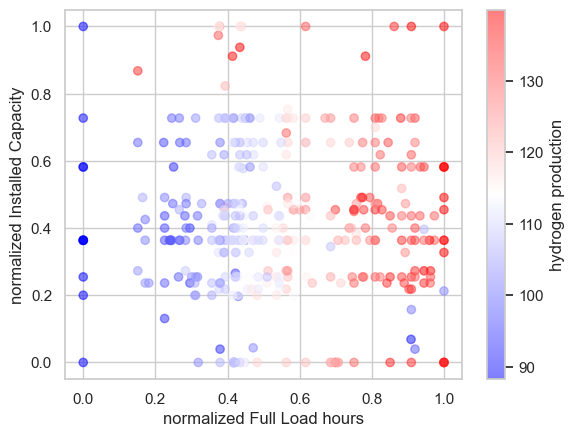

In [47]:
for i, col1 in enumerate(normalized_FLH.columns):
    if i ==0: 
        pass
    else:
        plt.scatter(normalized_FLH[col1], normalized_capacity[col1], 
                    c=H2Production_data_twh_clean[col1], cmap=bwr_reversed,  alpha=0.5) 
plt.colorbar( orientation='vertical',
             label="hydrogen production")        
plt.xlabel('normalized Full Load hours')
plt.ylabel("normalized Installed Capacity")   

In [48]:
Years_data["year"] = Years_data.index.values + 2050
Years_data.set_index('year', inplace = True)
Years_data.drop(2050, inplace = True)

In [49]:
high_electricity_years = Years_data[ElectricityPrices_data>50]
high_electricity_years_all = pd.melt(high_electricity_years )
high_electricity_years_all.drop("variable", axis = 1, inplace = True)

In [50]:
high_electricity_years_all.value_counts()

value 
1987.0    7
2010.0    7
1988.0    1
2011.0    1
dtype: int64

In [51]:
count_per_row = high_electricity_years.apply(lambda row: row.value_counts(), axis=1)
print(count_per_row)

      1987.0  1988.0  2010.0  2011.0
year                                
2051     NaN     NaN     NaN     NaN
2052     NaN     NaN     NaN     NaN
2053     NaN     NaN     NaN     NaN
2054     NaN     NaN     NaN     NaN
2055     1.0     NaN     NaN     NaN
2056     NaN     NaN     NaN     NaN
2057     NaN     1.0     1.0     NaN
2058     1.0     NaN     NaN     NaN
2059     NaN     NaN     NaN     NaN
2060     NaN     NaN     NaN     NaN
2061     NaN     NaN     NaN     NaN
2062     NaN     NaN     NaN     NaN
2063     NaN     NaN     NaN     NaN
2064     NaN     NaN     NaN     NaN
2065     NaN     NaN     1.0     NaN
2066     NaN     NaN     1.0     NaN
2067     1.0     NaN     NaN     NaN
2068     NaN     NaN     NaN     NaN
2069     NaN     NaN     NaN     NaN
2070     NaN     NaN     NaN     NaN
2071     NaN     NaN     1.0     NaN
2072     NaN     NaN     NaN     NaN
2073     NaN     NaN     NaN     NaN
2074     NaN     NaN     NaN     NaN
2075     1.0     NaN     NaN     NaN
2

In [52]:
melted_electricity_prices = ElectricityPrices_data.copy()
melted_electricity_prices.reset_index(inplace = True)
melted_electricity_prices =melted_electricity_prices.melt(id_vars='years', var_name='Variable', value_name='Value')

In [53]:
melted_LOLE = LOL_data.copy()
melted_LOLE.reset_index(inplace=True)
melted_LOLE = melted_LOLE.melt(id_vars='year', var_name='Variable', value_name='Value')

melted_cost_recovery = CostRecovery_data.copy()
melted_cost_recovery.reset_index(inplace=True)
melted_cost_recovery = melted_cost_recovery.melt(id_vars='year', var_name='Variable', value_name='Value') 

ENS_GWh = ENS_data.copy()
ENS_GWh = ENS_GWh/1000
melted_ENS = ENS_GWh.copy()
melted_ENS.reset_index(inplace=True)
melted_ENS = melted_ENS.melt(id_vars='year', var_name='Variable', value_name='Value')

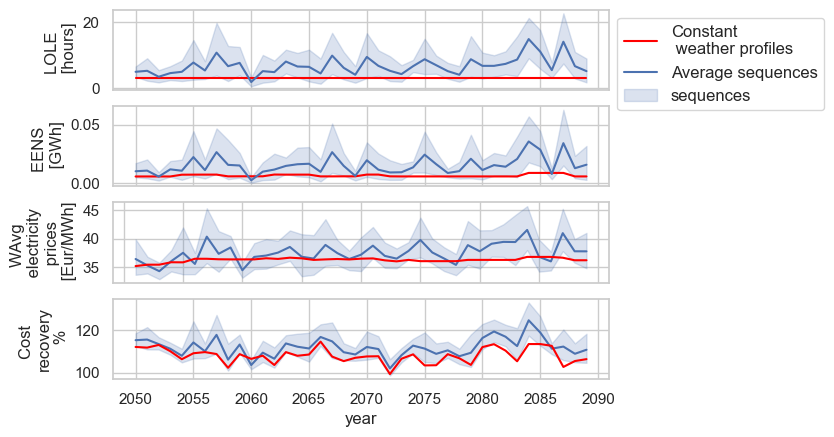

In [54]:
fig, axes= plt.subplots(nrows=4, ncols=1)

axes[0].set_ylabel('LOLE \n [hours]', fontsize='medium')
LOL_data["fix_profiles"].plot( ax=axes[0], color = "red")
sns.lineplot(x="year", y="Value",ax=axes[0],  data=melted_LOLE[melted_LOLE["Variable"].isin(selected_scenarios)] )
axes[0].legend(["Constant\n weather profiles","Average sequences", "sequences"], fontsize='medium',  bbox_to_anchor=(1 , 1))
axes[0].set_xticklabels([])

axes[1].set_ylabel('EENS \n [GWh]', fontsize='medium')
ENS_GWh["fix_profiles"].plot( ax=axes[1], color = "red")
sns.lineplot(x="year", y="Value",ax=axes[1],  data=melted_ENS[melted_ENS["Variable"].isin(selected_scenarios)])
axes[1].legend().remove()
axes[1].set_xticklabels([])

sns.lineplot(x="years", y="Value", ax=axes[2], data=melted_electricity_prices[melted_electricity_prices["Variable"].isin(selected_scenarios)])
ElectricityPrices_data["fix_profiles"].plot( ax=axes[2], color = "red")
axes[2].set_ylabel('WAvg \n electricity \n prices \n [Eur/MWh]', fontsize='medium')
axes[2].set_xticklabels([])

sns.lineplot(x="year", y="Value", ax=axes[3], data=melted_cost_recovery[melted_cost_recovery["Variable"].isin(selected_scenarios)])
CostRecovery_data["fix_profiles"].plot( ax=axes[3], color = "red")
axes[3].set_ylabel('Cost \nrecovery\n %', fontsize='medium')
plt.savefig(path_to_plots + '/' + 'LOLE_prices_recovery.png', bbox_inches='tight', dpi=300)     

In [55]:
melted_H2Production_data_twh = H2Production_data_twh.copy()
melted_H2Production_data_twh.reset_index(inplace = True)
melted_H2Production_data_twh.head()
melted_H2Production_data_twh =melted_H2Production_data_twh.melt(id_vars='year', var_name='Variable', value_name='Value')

In [56]:
melted_electricity_prices.head()

,years,Variable,Value
0,2051,fix_profiles,35.154800
1,2052,fix_profiles,35.403164
2,2053,fix_profiles,35.403164
3,2054,fix_profiles,35.832485
4,2055,fix_profiles,35.817028


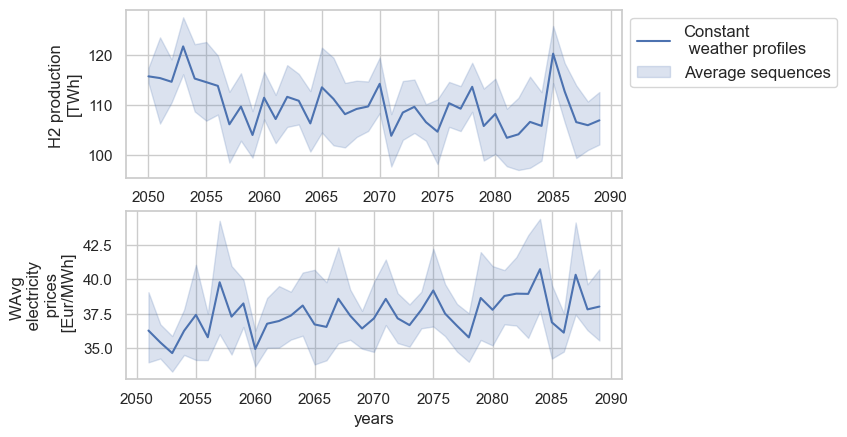

In [57]:
# fig, ax1 = plt.subplots()
# sns.lineplot(x="year", y="Value",  data=melted_electricity_prices)

# ax2.plot(InstalledCapacity_data, color = "red")
fig, axes= plt.subplots(nrows=2, ncols=1)
#H2Production_data_twh["fix_profiles"].plot( ax=axes[0], color = "red")
sns.lineplot(x="year", y="Value", ax=axes[0], data=melted_H2Production_data_twh)

axes[0].set_ylabel('H2 production \n[TWh]', fontsize='medium')
#axes[0].set_xticklabels([])
axes[0].set_xlabel("")
axes[0].legend(["Constant\n weather profiles","Average sequences", "sequences"], fontsize='medium',  bbox_to_anchor=(1 , 1))
sns.lineplot(x="years", y="Value", ax=axes[1], data=melted_electricity_prices)
axes[1].set_ylabel('WAvg \n electricity \n prices \n [Eur/MWh]', fontsize='medium')
axes[1].set_xlabel('years', fontsize='medium')
#ElectricityPrices_data["fix_profiles"].plot( ax=axes[1], color = "red")
plt.savefig(path_to_plots + '/' + 'H2production_electricityprices.png', bbox_inches='tight', dpi=300)

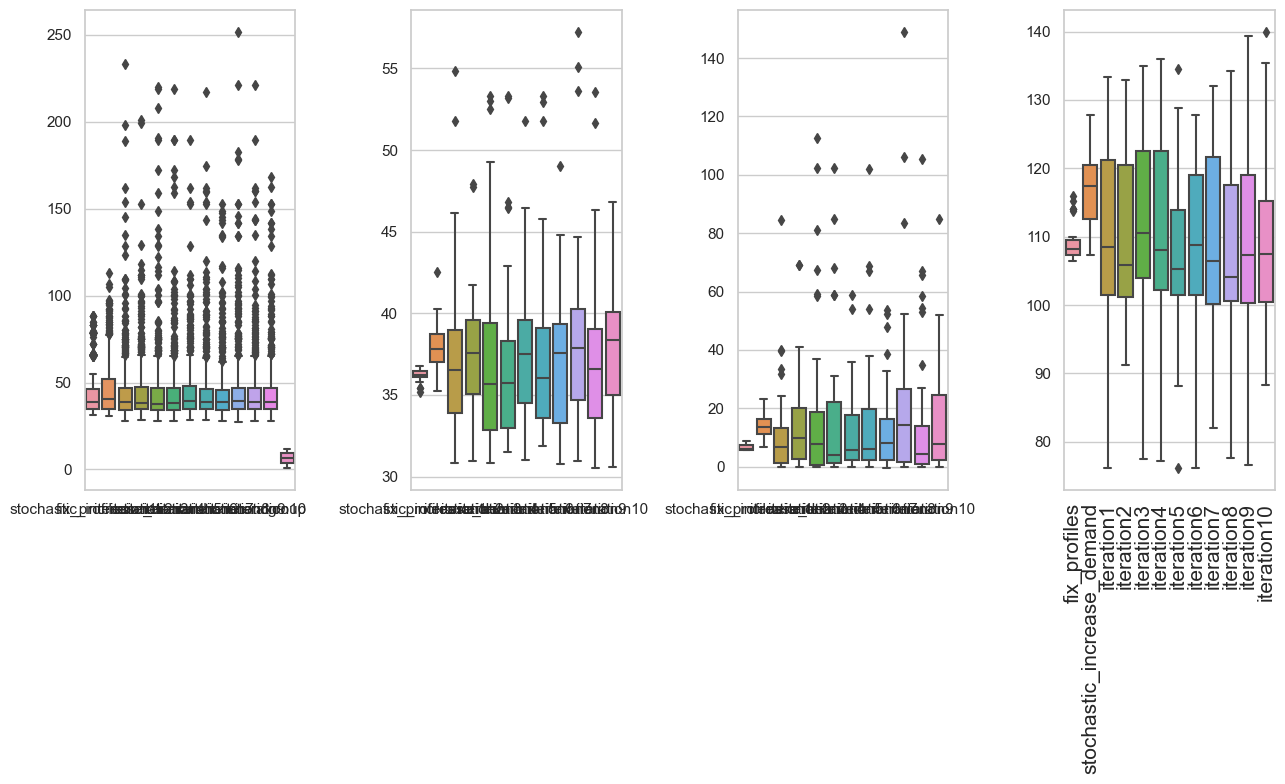

In [58]:
fig, axes= plt.subplots(nrows=1, ncols=4, figsize=(13, 8))
sns.boxplot( ax=axes[0], data=pd.melt(Monthly_ElectricityPrices_data),  x="variable", y="value")
#axes[0].set_title('Monthly Electricity Prices Eur/MWh')
#axes[0].set_xticks(rotation=90, size = 15)
plt.xticks(rotation=90, size = 15)   
sns.boxplot( data=pd.melt(ElectricityPrices_data), ax=axes[1], x="variable", y="value")
#axes[1].set_title('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(ENS_data), ax=axes[2],  x="variable", y="value")
#axes[2].set_title('ENS [GWh]', fontsize='large')
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(H2Production_data_twh),  ax=axes[3], x="variable", y="value")
#axes[3].set_title('Hydrogen produced [tons]', fontsize='large')


axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')

plt.xticks(rotation=90)   
plt.tight_layout()
axs1.savefig(path_to_plots + '/' + 'All.png', bbox_inches='tight', dpi=300)


In [71]:
iterations_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"].isin(selected_scenarios)]
iterations_NPV_ = iterations_NPV.groupby(["years"])["value"].describe()


In [70]:
fix_profiles_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="fix_profiles"]
fix_profiles_NPV_ = fix_profiles_NPV.groupby(["years"])["value"].describe()
fix_profiles_NPV_

,count,mean,std,min,25%,50%,75%,max
years,,,,,,,,
Nuclear,40.0,-2.808092e+06,61966.512195,-2.965604e+06,-2.829288e+06,-2.810579e+06,-2.769645e+06,-2.713062e+06
PV_utility_systems,40.0,-1.069323e+03,6233.628707,-3.037692e+04,-2.549314e+03,3.295147e+02,1.902503e+03,4.863641e+03
WTG_offshore,40.0,-1.292606e+04,39100.592779,-1.111939e+05,-1.309589e+04,-9.277613e+03,1.583481e+04,3.024845e+04
WTG_onshore,40.0,2.845223e+05,23890.052897,2.143411e+05,2.862716e+05,2.927577e+05,2.980650e+05,3.026624e+05
hydrogen_turbine,40.0,-1.219643e+05,53892.154082,-1.956675e+05,-1.554048e+05,-1.422333e+05,-7.927480e+04,-3.971055e+03


In [61]:
stochasticNPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="stochastic_increase_demand"]
stochasticNPV_ = stochasticNPV.groupby(["years"])["value"].describe()


In [62]:
iterations_profits =  AverageProfits_all[AverageProfits_all["scenario_name"].isin(selected_scenarios)]
iterations_profits_ = iterations_profits.groupby(["years"])["value"].describe()

In [69]:
fix_profiles_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="fix_profiles"]
fix_profiles_profits_ = fix_profiles_profits.groupby(["years"])["value"].describe()
fix_profiles_profits_

,count,mean,std,min,25%,50%,75%,max
years,,,,,,,,
Nuclear,40.0,-118376.156294,5970.036239,-133551.322190,-120418.241456,-118615.821944,-114672.053490,-109220.674052
PV_utility_systems,40.0,9013.217496,449.388336,6989.833384,8958.457982,9145.640708,9173.889469,9537.448497
WTG_offshore,40.0,35618.731897,2751.868260,28836.623204,35122.109758,35652.611970,37907.741240,39078.226493
WTG_onshore,40.0,53705.105768,1827.906918,48332.972530,53577.646584,54199.962691,54845.438713,55343.271951
hydrogen_turbine,40.0,367.933881,4646.983116,-5987.309869,-2515.559869,-1379.809869,4048.940131,10542.190131


In [64]:
stochastic_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="stochastic_increase_demand"]
stochastic_profits_ = stochastic_profits.groupby(["years"])["value"].describe()


In [65]:
ser1 = pd.concat([fix_profiles_NPV_[["mean", "std"]], stochasticNPV_[["mean", "std"]], iterations_NPV_[["mean", "std"]]], axis = 1)
ser1

,mean,std,mean,std,mean,std
years,,,,,,
Nuclear,-2.808092e+06,61966.512195,-2.611573e+06,162628.665838,-2.644124e+06,728228.052968
PV_utility_systems,-1.069323e+03,6233.628707,7.956064e+02,11730.120129,-3.356565e+02,33032.432721
WTG_offshore,-1.292606e+04,39100.592779,-8.487253e+03,47656.609139,1.798918e+04,74093.427658
WTG_onshore,2.845223e+05,23890.052897,3.021081e+05,45806.850782,3.234862e+05,119902.020860
hydrogen_turbine,-1.219643e+05,53892.154082,-5.773120e+04,112842.345144,1.118265e+05,559201.815706


In [66]:
ser2 = pd.concat([fix_profiles_profits_[["mean", "std"]], stochastic_profits_[["mean", "std"]], iterations_profits_[["mean", "std"]]], axis = 1)
ser2

,mean,std,mean,std,mean,std
years,,,,,,
Nuclear,-118376.156294,5970.036239,-99442.942787,15668.124510,-102579.032822,70159.634815
PV_utility_systems,9013.217496,449.388336,9173.248017,978.143034,9076.173768,2809.598986
WTG_offshore,35618.731897,2751.868260,35937.676717,3998.796222,38284.474388,6092.430323
WTG_onshore,53705.105768,1827.906918,55214.153913,3897.102655,57048.620377,10267.229453
hydrogen_turbine,367.933881,4646.983116,5906.590131,9730.107872,20527.120756,48218.547586


In [67]:
file = excelnpv =  os.path.join(path_to_plots,  "NPVs.xlsx")
with pd.ExcelWriter(file) as writer:
    ser1.to_excel(writer, sheet_name="npv", index=False)
    ser2.to_excel(writer, sheet_name="profits", index=False)